Set up our project environment (more on this later)

In [2]:
using Pkg
Pkg.activate(".")
Pkg.instantiate() # Only need the first time

  Activating project at `c:\Users\William\.julia\dev\JuliaNotes`


# Presentation

What to highlight:
* Speed
* Syntax
* Autodiff
* Multi-threading, distributed
* Turing
* GPU

I'm going to be talking up Julia a lot during this workshop, but I want to note:
* These are my own opions
* there's no universal "best" solution for everyone
* I am aware that it's *possible* to do most things in other languages

Instead, I hope to show you some of the areas that Julia really shines.

* I'm going to be contrasting Julia with Python a lot today since it's the language this audience is the most familiar with
* But I love Python! I used it for years, it's great at what it does, and has massive library of thoughfully developed packages

## Why Julia

* Our goal should be to "do" science as fast, and correctly as we can
* Easy to reproduce results: free, open source, good package management
* Easy to read, write, and *understand* (no black boxes!)
* And *very, very fast*

----
Where we were without Julia:

People want to develop their ideas in a convenient language like MATLAB or Python, but when their problems grows they need to stop and re-write it from scratch in a "hard" but fast language like C or Fortran.
This is called the **Two Language Problem**

This is a real impediment to research!

Since Python is so slow, most numerical libraries are actually written in C or Fortran
This leads to issues even if you never write your own pacakge:
   * The pacakge you need might not compile on your system
   * If you're using a library function, say numpy.median and you want to make your own version that's a little different, you can't (without learning all about C, compilers, combining C and Python, etc)
   * Libraries don't combine easily
   * Numbers work differently depending on if their in a NumPy array?
   * Lists vs arrays vs matrices?



Enter Julia....

Julia is a "new" programming language.

* 10th birthday on Monday!
* Roughly 100,000 users

* Created at MIT by Alan Edelman and his graduate students, now co-founders of Julia Computing
* Free open source language but you can pay for support



Julia is an interative language just like Python. You can use it in in a terminal, in Jupyter notebooks, in Pluto Notebooks (more on this later), VS Code, etc. But it's also a compiled language like C. 
The first time you run a function, it gets compiled to fast native code ("assembly").

In [3]:
@code_native 1 * 1

	.text
; ┌ @ int.jl:88 within `*`
	pushq	%rbp
	movq	%rsp, %rbp
	movq	%rcx, %rax
	imulq	%rdx, %rax
	popq	%rbp
	retq
	nopl	(%rax)
; └


Most of this is function call overhead. There is really only one instruction executed, `imulq`
This is not the case with Python, MATLAB, R, etc.
They read the text of your program and step through line by line.

We can estimate how many instructions Python uses to multiply two integers:

In [4]:
write("pythontest1.py", """

import time
start = time.time()
for i in range(0,1_000_000):
    i * i
end = time.time()
elapsed = (end - start)

instrs = 3.5e9 * elapsed/1_000_000

print(f"Est. instructions per Python multiply: {instrs}")
""")

# You may need to change this if you want to run these comparisons yourself
# pypath = "python"
pypath = raw"C:\Users\William\miniconda3\python.exe"
run(`$pypath pythontest1.py`);

Est. instructions per Python multiply: 659.2657566070557


This is a good estimate of how much faster Julia is than Python.
When I run the same test using large NumPy arrays (best case) I get around 12 instructions.

In general, Julia is roughly 100-400× faster than Python, and 10-50× faster than NumPy.
For some applications like differential equations or optimization, Julia can be **350×** faster than SciPy.

## So What?
* Because Julia is so fast, you can solve problems on your own laptop that would otherwise need a compute cluster
* Because it is compiled, you can write programs in natural ways without reaching for arrays all the time
* You can see how Julia packages work and make your own changes

Some words from Paul Barret:
> As an astronomer and scientific programmer at the Space Telescope Science Institute, I was one of the early developers of Numpy and matplotlib, and early advocates for its use by the astronomical community. It is now the de facto language in astronomy. However, we were aware of the two language problem at the time, but did not have the time nor the resources to implement a new language. Knowing this limitation, I was prepared to adopt Scipy's successor, if and when it arrived. Julia is that successor. Like 25 years ago, I am now advocating for Julia to become the de facto language in astonomy.

Let's dive in...

## Getting Started

### Get the notes
* Download these notes using `git` or as a zip folder from [GitHub](https://github.com/sefffal/JuliaNotes)
    * Click "Code" and then clone it, or "Download ZIP"

### Get Julia

* Download Julia: [`www.julialang.org`](https://www.julialang.org/downloads/).
Pick the current stable release.

* Install on your laptop 

* Pick either: VS Code or Jupyter

#### Jupyter
1. Start Julia in a terminal `julia`
2. Type `using IJulia` and then `y` to download
4. Run `jupyterlab()`

#### VS Code
1. Download Visual Studio Code: [`code.visualstudio.com`](https://code.visualstudio.com/download)
2. Click the "Extensions" button on the left panel and search for Julia.
3. Click "Install"


# Julia Syntax

Variables

In [5]:
a = 1
b = 3.0
c = 1//2

1//2

Mathematical expressions

In [6]:
α = 3a + 2c

∑x = sum(3xi^2 for xi = 1:10)

1155

Functions

In [7]:
f(x) = 2x^2 + 3x^3 + 6

f (generic function with 1 method)

In [8]:
f(2)

38

Mathemtically notation

In [9]:
∇²(σₐ) = √3 + log(σₐ)

∇²(12.0)

4.2169574573568775

There are a few different ways you can print things:

In [10]:
# Output a string (like Python print)
println("The answer to life, the universe, and everything is")

# Quick show for debugging
d = 42
@show d;

The answer to life, the universe, and everything is
d = 42


In [11]:
# Nice logging messages
@info "The answer ... is" d
@warn "But what is the question?"

┌ Info: The answer ... is
│   d = 42
└ @ Main c:\Users\William\.julia\dev\JuliaNotes\notes-1.ipynb:2
┌ Warning: But what is the question?
└ @ Main c:\Users\William\.julia\dev\JuliaNotes\notes-1.ipynb:3


## Types
In Julia, every value has a `type`. 

In [12]:
@show typeof(1)
@show typeof(1.0)
@show typeof("abc");

typeof(1) = Int64
typeof(1.0) = Float64
typeof("abc") = String


There are lots of different types in Julia. They decide what your program does!
But you almost never need to specify them and they get inferred automatically.

## Importing Libraries

The normal way to import Julia libraries is with `using SomePackage`

This loads the package (if installed).

You can then access functions from that package like `SomePackage.func()`:

In [13]:
using Downloads
filename = Downloads.download("https://wttr.in/")

println(readuntil(filename, "┌"))

Weather report: Victoria, Canada

      \   /     Clear
       .-.      +2(1) °C       
    ― (   ) ―   → 2 km/h       
       `-’      10 km          
      /   \     0.0 mm         
                                                       


Whenever it's not ambiguous, most Julia packages `export` their key functions so you can use them without a prefix:

In [14]:
using Statistics
mean([1,2,3])

2.0

You can load most kinds of files using the `load` function as long as you have the right package installed.
Here we'll download a an image as a PNG and load it:

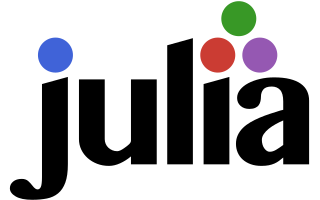

In [15]:
using Images
filename = Downloads.download("https://github.com/JuliaLang/julia-logo-graphics/blob/master/images/julia-logo-color.png?raw=true")

load(filename)

## Arrays
In Julia, vectors, matrices, etc are all just `Array`s:

In [16]:
x = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

You can push new items into a vector using `push!`: The `!` isn't anything special. People add it to function names as a convention when that function modifies something.

In [17]:
push!(x, 4)

4-element Vector{Int64}:
 1
 2
 3
 4

Array indexing starts at 1! 

The first element is index 1, the second is 2, *wow*!

In [22]:
q = [1,2,3,4]
@show q[1] q[2] q[3];

q[1] = 1
q[2] = 2
q[3] = 3


You can also use `begin` and `end`:

In [25]:
@show q[begin]
@show q[end]
@show q[end - 1]

@show q[begin:end÷2]

@show q[begin:end÷2]

q[begin] = 1
q[end] = 4
q[end - 1] = 3
q[begin:end ÷ 2] = [1, 2]


2-element Vector{Int64}:
 1
 2

Just like MATLAB and Fortran, in Julia 1D arrays are column vectors by default. This is opposite from Python!

You can make matrices really easily:

In [18]:
A = [
    1 2 3
    4 5 6
    7 8 9
]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

Operators like `*`, `^2`, `sin()`, or `exp()` apply to their whole argument (unlike NumPy):

In [19]:
A^2

3×3 Matrix{Int64}:
  30   36   42
  66   81   96
 102  126  150

In [20]:
exp(A)

3×3 Matrix{Float64}:
 1.11891e6  1.37482e6  1.63072e6
 2.53388e6  3.11342e6  3.69295e6
 3.94886e6  4.85201e6  5.75517e6

In [21]:
A * [1, 2, 3]

3-element Vector{Int64}:
 14
 32
 50

## Broadcasting
If you want to apply an operation *element wise* you can prefix anything (**anything**) with a `.`:

In [22]:
A .* [1, 2, 3]

3×3 Matrix{Int64}:
  1   2   3
  8  10  12
 21  24  27

In [23]:
A.^2

3×3 Matrix{Int64}:
  1   4   9
 16  25  36
 49  64  81

In [24]:
[1 2 3] .* [
             1
             2
             3 ]

3×3 Matrix{Int64}:
 1  2  3
 2  4  6
 3  6  9

In [25]:
sin.(A)

3×3 Matrix{Float64}:
  0.841471   0.909297   0.14112
 -0.756802  -0.958924  -0.279415
  0.656987   0.989358   0.412118

In [26]:
strs = [
    "A",
    "B",
    "C",
]
strs2 = ["a" "b"]
strs .* strs2

3×2 Matrix{String}:
 "Aa"  "Ab"
 "Ba"  "Bb"
 "Ca"  "Cb"

Ranges just store the start, step, and stop, but otherwise work just like any other Array:

In [27]:
1:5

1:5

In [28]:
y = vcat(1:5, 6:8)

8-element Vector{Int64}:
 1
 2
 3
 4
 5
 6
 7
 8

In [29]:
@show length(A)
@show size(A)
@show eachindex(A);

length(A) = 9
size(A) = (3, 3)
eachindex(A) = Base.OneTo(9)


### Boolean Masks, Slicing

In [35]:
a = randn(10)
mask = -0.8 .< a .< 0.8

10-element BitVector:
 0
 0
 0
 1
 0
 1
 0
 1
 1
 1

In [36]:
a[mask]

5-element Vector{Float64}:
 -0.6156713921600271
 -0.7578740036675421
  0.5049952322965069
 -0.24989711078683527
 -0.34485944759162057

In [40]:
if 2 ∈ (1,2,3,4)
    println("This is an if statement")
end

if 2 in (1,2,3,4)
    println("This way is fine too")
end

This is an if statement
This way is fine too


## Loops 
Loops are not bad! You can use for loops in your Julia programs as much as you want †, or you can use arrays if that makes more sense for a problem. You are free to choose!

†: If they're inside functions


In [30]:
for i in 1:10
    println(i^2)
end

1
4
9
16
25
36
49
64
81
100


In [17]:
for i in 1:9, j in 'A':'G'
    print(j,i," ")
    if j == 'G'
        println()
    end
end

A1 B1 C1 D1 E1 F1 G1 
A2 B2 C2 D2 E2 F2 G2 
A3 B3 C3 D3 E3 F3 G3 
A4 B4 C4 D4 E4 F4 G4 
A5 B5 C5 D5 E5 F5 G5 
A6 B6 C6 D6 E6 F6 G6 
A7 B7 C7 D7 E7 F7 G7 
A8 B8 C8 D8 E8 F8 G8 
A9 B9 C9 D9 E9 F9 G9 


## Symbolic Calculations
You can combine your calculations with symbolic variables, a bit like SymPy or Mathematica

In [31]:
using Symbolics
@variables u v w

expr = exp(u)^w / w

(exp(u)^w) / w

In [32]:
simplify(expr)

exp(u*w) / w

## Automatic Differentiation

Most Julia code can be differentiated just like any other mathematical expression using an autodiff library. Here, we'll use ForwardDiff.jl.

This is a super power: if you have a forward modelling code and you want to compare it to data, you can get not just the $\chi^2$ but also the gradient of that $\chi^2$ with respect to all your model parameters. This can make your modelling code even more efficient!


In [33]:
using ForwardDiff

model(x, μ, A, σ) = A * exp(-(x-μ)^2/σ)

xdat = 0:0.5:3
dat = sin.(xdat)

meansquare(d1, d2) = sqrt(mean((d1 .- d2).^2))

fit((μ, A, σ)) = meansquare(model.(xdat, μ, A, σ), dat)

fit((1, 0.1, 2))


0.6082812951104912

In [34]:
ForwardDiff.gradient(fit, [1, 0.1, 2])

3-element Vector{Float64}:
 -0.025605665549015857
 -0.6031166374068061
 -0.00732369724687677

All second order partial derviatives (the Hessian matrix):

In [35]:
ForwardDiff.hessian(fit, [1, 0.1, 2])

3×3 Matrix{Float64}:
  0.0333105   -0.276872    0.00476344
 -0.276872     0.204517   -0.0720698
  0.00476344  -0.0720698   0.00490133

## Uncertainty

In [36]:
using Measurements
a = 2 ± 1
b = 4 ± 2

a * b

8.0 ± 5.7

## Data
Julia has great libraries for working with tabular data. You can easily load:
 * CSV
 * Numpy .npz
 * Excel
 * R data
 * MATLAB .mat
 * SQL
 * Arrow
 
And so many more...

In [4]:
using DataFrames

df = DataFrame(
    "A" =>  1:10,
    "B" => 11:20
)

,A,B
,Int64,Int64
1,1,11
2,2,12
3,3,13
4,4,14
5,5,15
6,6,16
7,7,17
8,8,18
9,9,19


Let's load the Hipparcos-Gaia Catalog of Accelerations by Tim Brandt (2021) as a CSV file:

In [5]:
using CSV

# Show more columns by default in the notebook...
ENV["ROWS"] = 12
ENV["COLUMNS"] = 600

hgca = CSV.read("HGCA_vEDR3.csv", DataFrame)

,hip_id,gaia_source_id,gaia_ra,gaia_dec,radial_velocity,radial_velocity_error,radial_velocity_source,parallax_gaia,parallax_gaia_error,pmra_gaia,pmdec_gaia,pmra_gaia_error,pmdec_gaia_error,pmra_pmdec_gaia,pmra_hg,pmdec_hg,pmra_hg_error,pmdec_hg_error,pmra_pmdec_hg,pmra_hip,pmdec_hip,pmra_hip_error,pmdec_hip_error,pmra_pmdec_hip,epoch_ra_gaia,epoch_dec_gaia,epoch_ra_hip,epoch_dec_hip,crosscal_pmra_hip,crosscal_pmdec_hip,crosscal_pmra_hg,crosscal_pmdec_hg,nonlinear_dpmra,nonlinear_dpmdec,chisq
,Int64,Int64,Float64,Float64,Float64?,Float64?,String15,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,2738327528519591936,0.000871957,1.08898,8.26094,0.264233,Gaia_DR2,5.4151,0.0331369,-0.360141,-5.05262,0.0790698,0.0295514,0.112322,-5.83165,-5.09297,0.0508516,0.0285352,0.370446,-4.87324,-1.01569,1.30626,0.798923,0.350112,2015.93,2015.53,1991.55,1991.28,-0.0284562,0.466251,-0.00134159,-0.00372788,4.26126e-7,5.66852e-6,3515.52
2,2,2341871673090078592,0.00511158,-19.4988,missing,missing,None,26.7979,0.506636,179.805,-1.04101,0.783449,0.57891,0.0693343,181.51,-0.440148,0.0482116,0.0287168,0.124236,183.278,-1.27354,1.40956,0.783624,0.143072,2015.82,2015.51,1991.48,1991.42,-0.384869,0.0401743,-0.0116708,0.00813583,7.97636e-6,0.000668439,5.51048
3,3,2881742980523997824,0.00506023,38.8593,0.0,4.2,Gaia_DR2,2.99269,0.0427549,5.76132,-2.40556,0.0375025,0.0315063,0.187129,5.76201,-2.47363,0.0143335,0.0116901,0.0793275,4.6529,-2.96515,0.488108,0.414301,0.174885,2016.61,2016.14,1990.85,1991.05,0.0157797,0.245494,0.00264757,-0.000475211,-7.44679e-7,-1.75141e-6,4.24397
4,4,4973386040722654336,0.00907157,-51.8935,missing,missing,None,7.31314,0.0213819,61.9649,1.30216,0.0185844,0.0254567,-0.334147,61.9723,1.30706,0.0174344,0.0209368,-0.324121,62.849,0.552826,0.600688,0.572225,-0.160557,2015.97,2016.02,1991.01,1991.18,0.141746,0.317793,-0.0229892,0.0140929,-5.84233e-6,0.000294803,0.153008
5,5,2305974989264598272,0.00997423,-40.5912,20.1973,0.174826,Gaia_DR2,2.60551,0.0220667,1.02164,8.73266,0.0284247,0.0259288,0.0296427,0.986495,8.74377,0.0219728,0.0215064,0.0697696,1.86614,8.63798,0.634796,0.700016,0.089169,2016.38,2015.88,1991.1,1991.48,-0.154247,0.0743634,-0.0149238,-0.0119545,-1.91705e-6,-1.20387e-5,1.09704
6,6,2740326852975975040,0.019676,3.94641,-1.41318,0.549218,Gaia_DR2,15.3938,0.0294875,223.197,-11.4984,0.0397578,0.0259851,0.226979,223.167,-11.5861,0.173997,0.0960696,0.369584,224.047,-14.0697,5.77342,3.18512,0.254783,2015.95,2015.43,1991.34,1991.26,-0.0202837,0.292651,0.00315663,-0.0148663,0.000119214,-0.000207324,0.803724
7,7,2846308881856186240,0.0210282,20.0353,5.34501,0.218706,Gaia_DR2,17.4912,0.0242287,-206.509,-196.098,0.0389593,0.0172017,-0.0983088,-211.04,-197.017,0.0392897,0.0308591,0.326317,-207.907,-200.985,1.09466,0.776415,0.410332,2015.62,2015.34,1991.29,1991.23,0.0845642,0.211941,0.0380017,-0.00486428,0.00135701,-0.000442318,6859.68
8,8,2853169937491828608,0.0274359,25.8864,-31.0,4.6,Gaia_DR2,1.52042,0.0595536,18.7456,-6.4717,0.0940196,0.0485898,-0.22311,18.7125,-6.63527,0.0479436,0.031393,0.024752,19.0393,-6.35167,1.32206,0.769785,0.0495995,2016.07,2015.82,1991.57,1991.45,-0.0637585,0.18816,0.00796219,-0.0252843,1.70947e-5,-1.74072e-5,8.60121
9,9,2880160886370458368,0.0352903,36.586,14.8068,0.164856,Gaia_DR2,3.10007,0.0237009,-6.0707,9.29572,0.0278574,0.0208069,-0.145737,-6.0434,9.24368,0.0343399,0.0213056,0.0116024,-6.82103,8.71982,1.04833,0.639637,0.114597,2015.94,2015.85,1991.26,1991.2,-0.16195,0.252334,-0.000240517,-0.00891998,5.08093e-6,-1.27994e-5,3.32158


This catalog gives the position, RV, proper motion, and astrometric acceleration of nearby stars by cross calibrating Hipparcos and GAIA.

Let's select nearby stars with the most astrometric acceleration:

In [6]:
nearby = filter(hgca) do row
    row.parallax_gaia > 30 # About 40pc
end


sort!(nearby, [:chisq], rev=true)

# And let's pick the top  1000
beststars = nearby[1:1000, :]

,hip_id,gaia_source_id,gaia_ra,gaia_dec,radial_velocity,radial_velocity_error,radial_velocity_source,parallax_gaia,parallax_gaia_error,pmra_gaia,pmdec_gaia,pmra_gaia_error,pmdec_gaia_error,pmra_pmdec_gaia,pmra_hg,pmdec_hg,pmra_hg_error,pmdec_hg_error,pmra_pmdec_hg,pmra_hip,pmdec_hip,pmra_hip_error,pmdec_hip_error,pmra_pmdec_hip,epoch_ra_gaia,epoch_dec_gaia,epoch_ra_hip,epoch_dec_hip,crosscal_pmra_hip,crosscal_pmdec_hip,crosscal_pmra_hg,crosscal_pmdec_hg,nonlinear_dpmra,nonlinear_dpmdec,chisq
,Int64,Int64,Float64,Float64,Float64?,Float64?,String15,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,19233,4675955810263106432,61.8421,-64.2209,28.5044,0.155054,Gaia_DR2,42.382,0.0274924,186.418,337.075,0.0527617,0.0458047,0.208572,209.775,328.05,0.0136742,0.0143729,-0.0662618,185.747,337.223,0.410465,0.45747,-0.074494,2016.2,2016.04,1991.36,1991.21,0.0165383,0.293973,0.0095606,0.00929145,-0.0135578,-0.00602422,2.58323e5
2,17544,5080543413172761088,56.3521,-27.862,32.522,0.183033,Gaia_DR2,48.4931,0.0285364,303.236,111.826,0.028661,0.0362368,-0.25705,315.158,123.197,0.0276666,0.0300863,-0.229936,320.541,139.488,0.700119,0.81371,0.00505769,2016.27,2016.12,1991.22,1991.34,-0.191166,-0.135774,-0.00215582,0.0118704,-0.0133431,-0.00155309,1.94791e5
3,25119,3234412606443085824,80.6565,2.60239,36.2951,0.243,Gaia_DR2,50.5171,0.0368108,65.9528,-182.17,0.0587524,0.0388484,-0.297233,58.3898,-160.637,0.0447782,0.0309374,0.284081,55.2318,-139.336,1.35817,0.840188,0.19827,2016.28,2016.63,1991.05,1990.85,-0.132147,0.158557,-0.0124356,0.00754834,-0.00315222,0.00881162,1.9276e5
4,103455,1844639838900425472,314.417,26.4055,-26.797,0.20024,Gaia_DR2,31.2765,0.036503,251.123,84.9655,0.0451634,0.0442197,-0.260593,256.675,100.519,0.0172346,0.015751,0.00741566,272.954,96.1199,0.567809,0.494177,0.0149795,2016.25,2016.27,1991.47,1991.08,-0.237511,0.254862,-0.00274456,0.0138432,0.00595898,-7.6631e-5,1.48103e5
5,117712,2232348941893483520,358.111,75.5447,4.6,0.2,Gaia_DR2,91.7722,0.0424846,309.9,25.3336,0.0714962,0.0814236,-0.348172,334.368,24.4612,0.0148906,0.0135989,-0.100359,341.245,41.7322,0.460519,0.421117,-0.127966,2016.26,2016.08,1991.49,1991.45,-0.0486428,0.153616,0.000681684,-0.0051896,-0.00150423,-0.022521,1.2429e5
6,89912,4586000675189058304,275.205,27.5308,-20.9144,0.173702,Gaia_DR2,34.6195,0.0240315,42.5762,88.6412,0.0267923,0.0297979,0.0322418,37.5562,98.3828,0.0142369,0.017255,0.0126017,40.788,105.877,0.479597,0.571104,0.00335314,2015.93,2016.06,1991.36,1991.45,0.0347571,-0.13337,-0.00169269,-0.000480918,0.000889002,0.00155841,1.10084e5
7,68,2772904695310603520,0.200194,16.9868,-17.7872,0.407923,Gaia_DR2,33.259,0.0427849,-52.2017,-307.385,0.0753759,0.0413901,-0.0393014,-62.2969,-322.491,0.0375684,0.0249622,0.384882,-99.3582,-317.879,1.0712,0.730856,0.335535,2015.73,2015.77,1991.19,1991.33,-0.070675,0.248471,0.0197106,-0.00865357,-0.000479286,-0.00460067,1.08029e5
8,85007,4570293086432167168,260.616,24.8786,34.1877,0.140003,Gaia_DR2,33.5684,0.0166339,74.258,-176.618,0.0189082,0.0221509,0.0211881,67.3057,-173.888,0.0127318,0.0192025,0.140598,63.0605,-160.505,0.433724,0.683268,0.125548,2016.09,2016.02,1991.3,1991.3,-0.0508317,-0.271464,-0.00875678,-0.00931728,-0.00252259,0.00499101,1.05814e5
9,107062,1766575647197540480,325.255,11.2625,-50.1466,0.14779,Gaia_DR2,31.4285,0.0313921,-75.1187,-109.887,0.0390955,0.0428239,0.115052,-68.0204,-123.343,0.0471634,0.0252716,0.357898,-72.5208,-111.946,1.69563,0.924498,0.43533,2016.11,2016.54,1991.2,1991.82,0.136809,0.406002,-0.00791931,0.00366027,-0.00291692,-0.00444304,1.03694e5


## Plotting

There are two great sets of plotting packages: `Plots.jl` and `Makie.jl`. Makie is a little slow to start creates really beautiful, interactive plots, so we'll use that today.

In [3]:
using WGLMakie

# CairoMakie: for nice PDF exports, figures for papers
# GLMakie   : for interactive or 3D plots in a separate window
# WGLMakie  : for quick interactive plots in Jupyter

For presenting this notebook, I would like a larger font size

In [8]:
fontsize_theme = Theme(fontsize =20)
set_theme!(fontsize_theme)

In [41]:
lines(1:90, sind.(1:90), axis=(xlabel="x", ylabel="y"))

In [ ]:
x = range(-π, π, length=100)
y = range(-π, π, length=100)
z = sinc.(sqrt.(x.^2 .+ y'.^2))

surface(x, y, z, colormap=:plasma)

More complex layout:

In [ ]:
fig = Figure(
    resolution=(800,800)
)

xx = π/2*randn(1000)
yy = π/2*randn(1000)

ax1 = Makie.Axis(fig[1,1], xlabel="x", ylabel="y")
scatter!(ax1, xx, yy, )

ax2 = Makie.Axis(fig[2,1], xlabel="x", ylabel="y")
h = contourf!(ax2, x, y, z)

Colorbar(fig[1:2, 2], h, label="Colorbar")


linkxaxes!(ax1, ax2)

fig

## Plotting our DataFrame
Returning to our catalog of favourite stars (that likely have companions), let's plot their positions in the sky


In [43]:
fig,ax,pl = scatter(
    beststars.gaia_ra,
    beststars.gaia_dec,
    markersize=beststars.parallax_gaia ./ 5,
    color=log.(beststars.chisq),
    colormap=:turbo,
    axis=(;
        backgroundcolor=:black,
        gridcolor=:white,
        xlabel="RA",
        ylabel="DEC",
    )
)
Colorbar(fig[1,2], pl, label="significance")
fig

In [98]:
ρ = 1 ./ (nearby.parallax_gaia .* 1e-3)
φ = nearby.gaia_ra
θ = nearby.gaia_dec
rv = nearby.radial_velocity
rv[ismissing.(rv)] .= 0

# Spherical to Cartesian conversion
x = @. ρ * sin(φ) * cos(θ)
y = @. ρ * sin(φ) * sin(θ)
z = @. ρ * cos(φ)
# scatter(x, y, z)
fig, ax, pl = scatter(
    x,
    y,
    z,
    markersize=1000,
    color=atan.(rv),
    colormap = :bkr,
    axis = (;
        backgroundcolor=:black
    ),
    figure = (;
        resolution = (1200,900),
        backgroundcolor=:black

    )
)
scatter!(ax, [0],[0],[0], marker='⋆', color=:yellow, markersize=10000)
fig

## Statistical Modelling

The package [Turing.jl](https://turing.ml/stable/) offers a powerful language for doing Bayesian modelling.
The syntax  $ x \sim \rm{Normal(1,2)} $ is a little uncommon in astronomy, but in Statistics it's a standard way of saying that $x$ is a random variable with the probability distribution of $1 \pm 2$.

Like most Julia packages, Turing can be mixed with other packages to create something better than the sum of it's parts. For example, you can combine Turing with the Flux.jl deep learning library to create Bayesian neural nets.

We'll start by generating some simulated data of a linear relationship:

In [107]:
N = 40
x = 20rand(N)
m = 0.4
b = 4
y = m .* x .+ b .+ 2randn(N)

scatter(
    x, y,
    axis=(
        xlabel="x",
        ylabel="y",
    )
)

In [111]:
using Turing

# Define a simple Normal model with unknown mean and variance.
@model function linear_regression_1(x, y)

    # Priors on slope, itercept, and variance
    m  ~ Normal(sqrt(10))
    σ₂ ~ TruncatedNormal(0, 100, 0, Inf)
    β  ~ Normal(0, sqrt(3))

    # Equation of a line
    μ = β .+ m .* x

    # We model our y points has being drawn from a Normal distribution about that line
    y ~ MvNormal(μ, sqrt(σ₂))
end

#  Run sampler, collect results
model = linear_regression_1(x, y)
chain = sample(model, NUTS(0.65), 3_000);

Sampling   0%|█                                         |  ETA: N/A
Sampling 100%|██████████████████████████████████████████| Time: 0:00:02
Sampling   0%|█                                         |  ETA: N/A
Sampling 100%|██████████████████████████████████████████| Time: 0:00:00
Sampling   0%|█                                         |  ETA: N/A
┌ Info: Found initial step size
│   ϵ = 0.025
└ @ Turing.Inference C:\Users\William\.julia\packages\Turing\QRn5N\src\inference\hmc.jl:188
Sampling   0%|█                                         |  ETA: 0:41:37
Sampling   1%|█                                         |  ETA: 0:20:46
Sampling   2%|█                                         |  ETA: 0:13:47
Sampling   2%|█                                         |  ETA: 0:10:17
Sampling   2%|██                                        |  ETA: 0:08:12
Sampling   3%|██                                        |  ETA: 0:06:48
Sampling   4%|██                                        |  ETA: 0:05:48
Sampling  


Sampling  47%|████████████████████                      |  ETA: 0:00:15
Sampling  48%|████████████████████                      |  ETA: 0:00:14
Sampling  48%|█████████████████████                     |  ETA: 0:00:14
Sampling  49%|█████████████████████                     |  ETA: 0:00:14
Sampling  49%|█████████████████████                     |  ETA: 0:00:13
Sampling  50%|█████████████████████                     |  ETA: 0:00:13
Sampling  50%|██████████████████████                    |  ETA: 0:00:13
Sampling  51%|██████████████████████                    |  ETA: 0:00:13
Sampling  51%|██████████████████████                    |  ETA: 0:00:12
Sampling  52%|██████████████████████                    |  ETA: 0:00:12
Sampling  52%|██████████████████████                    |  ETA: 0:00:12
Sampling  53%|███████████████████████                   |  ETA: 0:00:12
Sampling  53%|███████████████████████                   |  ETA: 0:00:11
Sampling  54%|███████████████████████                   |  ETA:


Sampling  85%|████████████████████████████████████      |  ETA: 0:00:02
Sampling  85%|████████████████████████████████████      |  ETA: 0:00:02
Sampling  86%|████████████████████████████████████      |  ETA: 0:00:02
Sampling  86%|█████████████████████████████████████     |  ETA: 0:00:02
Sampling  87%|█████████████████████████████████████     |  ETA: 0:00:02
Sampling  87%|█████████████████████████████████████     |  ETA: 0:00:02
Sampling  88%|█████████████████████████████████████     |  ETA: 0:00:02
Sampling  88%|█████████████████████████████████████     |  ETA: 0:00:02
Sampling  89%|██████████████████████████████████████    |  ETA: 0:00:02
Sampling  89%|██████████████████████████████████████    |  ETA: 0:00:02
Sampling  90%|██████████████████████████████████████    |  ETA: 0:00:02
Sampling  90%|██████████████████████████████████████    |  ETA: 0:00:01
Sampling  91%|███████████████████████████████████████   |  ETA: 0:00:01
Sampling  91%|███████████████████████████████████████   |  ETA:

In [112]:
# Summarize results
chain

Chains MCMC chain (3000×15×1 Array{Float64, 3}):

Iterations        = 1001:1:4000
Number of chains  = 1
Samples per chain = 3000
Wall duration     = 13.6 seconds
Compute duration  = 13.6 seconds
parameters        = m, σ₂, β
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat   ess_per_sec 
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64       Float64 

           m    0.4632    0.0571     0.0010    0.0016   1095.0711    1.0008       80.4903
          σ₂    4.2234    1.1040     0.0202    0.0350   1127.5229    1.0007       82.8756
           β    3.6133    0.7503     0.0137    0.0215   1080.3740    1.0001       79.4101

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64  

Let's visualize the posterior:

In [141]:
# We'll plot our posterior samples as lines with 200 steps between 0 and 20
xpost = range(-5, 25, length=200)

# Grab 300 posterior samples at random
ii = rand(eachindex(chain["m"]), 300)
ypost = chain["m"][ii] .* xpost' .+ chain["β"][ii]

fig, ax, pl = series(
    xpost,ypost,

    solid_color=(:black, 0.02),
    label="posterior",
    axis=(
        xlabel="x",
        ylabel="y",
    ),

)

# Overplot our data
s = scatter!(ax, x, y, label="data")

Legend(fig[1,2], [s,pl], ["data","posterior"], "Legend")

xlims!(ax, low=-2, high=22)

fig

## Differential Equations
Differential equations are ubiquitous in the sciences. Julia has the best differential equations solving libraries (parts of SciMl).

![](https://benchmarks.sciml.ai/dev/markdown/MultiLanguage/figures/wrapper_packages_2_1.png)

This is a plot of error vs. time. Lower and to the left is better.

Julia's DifferentialEquations library blows everything else out of the water, including the best C libraries.

In [49]:
using DifferentialEquations

function lorenz!(du, u,p,t)
    du[1] = 10.0*(u[2]-u[1])
    du[2] = u[1]*(28.0-u[3]) - u[2]
    du[3] = u[1]*u[2] - (8/3)*u[3]
end

ArgumentError: ArgumentError: Package DifferentialEquations not found in current path:
- Run `import Pkg; Pkg.add("DifferentialEquations")` to install the DifferentialEquations package.


## Bonus: GPU Compute
It's very easy to get started with GPU computing in Julia since Julia can be compiled to the GPU.
GPU numerical programming in general is only supported in Windows and Linux with discrete NVidia or AMD GPUs.

I didn't include the CUDA package in this notebook, so you would need to install it yourself by running
```julia
using Pkg
Pkg.add("CUDA")
```

In [ ]:
using CUDA

# Create 10000 random floats
arr = randn(Float32, 10000)

# Transfer them to the GPU
cu_arr = CuArray(arr)

# Calculate the sum of squares now using your GPU! It's that easy!
sum(cu_arr .^2)